# Homework 2
## problem 1
Show that the stationary point (zero gradient) of the function <br>
$ f(x_1,x_2) = 2x_1^2 -4x_1x_2 + 1.5x_2^2 + x_2 \ $
is a saddle (with indefinite Hessian).

$ g(x_1,x_2) = \begin{bmatrix} 4x_1 - 4x_2 \\ -4x_1 + 3x_2 + 1 \end{bmatrix} $ <br>

$ H(x_1,x_2) = \begin{bmatrix} 4 & -4 \\ -4 & 3 \end{bmatrix} $ <br>
$ | H - \lambda I | = 0 $ <br>
$ \begin{vmatrix} 4-\lambda & -4 \\ -4 & 3-\lambda \end{vmatrix} = 0 = (4-\lambda)(3-\lambda) - (-4*-4)$
$\\ = 12 - 7\lambda + \lambda^2 - 16 \\ \quad \lambda^2 - 7\lambda - 4 = 0$
$\\ \lambda = 7.5311\  ;\ -0.5311$
The Hessian of this function has both negative and positive eigen values. This means the Hessian is indefinite and the function has a saddle point. This saddle point occurs at (1,1). <br><br>

Taylor Series expansion <br>
$f(x_1,x_2) = f(1,1) + g|^T_{(1,1)}\begin{bmatrix} x_1-1 \\ x_2-1\end{bmatrix} + \frac{1}{2} \begin{bmatrix} x_1-1 \\ x_2-1\end{bmatrix} ^T \begin{bmatrix} 4 & -4 \\ -4 & 3\end{bmatrix} \begin{bmatrix} x_1-1 \\ x_2-1\end{bmatrix} $ <br>
g(X) evaluated at (1,1) is equal to zero so it drops out. Doing the vector multiplication:<br>
$ f(x_1,x_2) - f(1,1) = \frac{1}{2}  \left( 4( \partial x_1)^2 - 4 \partial x_1 \partial x_2 - 4\partial x_1 \partial x_2 + 3(\partial x_2)^2 \right) $
Where $ \partial x_i = x_i -1 \ $ for $i=1,2 $ <br>
The right hand side of the equation can be factored into:
$ \frac{1}{2} (2\partial x_1 - 3\partial x_2)(2\partial x_1 - \partial x_2) $
The downward slopes occur when $ \frac{1}{2} (2\partial x_1 - 2\partial x_2)(2\partial x_1 - \partial x_2) < 0$
There is a downward slope when only one factor is negative.
$ 2\partial x_1 <\partial x_2 \quad 2\partial x_1 < \partial x_2 $ <br>
so Any direction between vectors <3,2> and <1,2> or the negative counterparts has a downward slope.

## Probelm 2
Find the point in the plane $ x_1 + 2x_2+3x_2 = 1 \ $ in $\mathbb{R}^3\ $ that is nearest to the point $(-1,0,1)^T\ $ Is this a convex problem? <br><br>

The distance formula can be squared to create a sum of squares. point $(-1,0,1)^T\ $ is used in this formula as a point:
\begin{equation} \text{distance}^2 = (x_1 +1)^2 + (x_2)^2 + (x_3-1)^2\end{equation} <br>
This equation requires constraints in order to work. To make it an unconstrained problem, one x can be found in terms of the other x's. The possible equations are as follows:<br>
$ x_1 = 1 - 2x_2 - 3x_3 \\ x_2 = \frac{1}{2} - \frac{1}{2}x_1 - \frac{3}{2}x_3 \\ x_3 = \frac{1}{3} - \frac{1}{3}x_1 - \frac{2}{3}x_2 $
<br>
In an effort to avoid fractions, $x_1= f(x_2,x_3)\ $
\begin{equation} (2 - 2x_2-3x_3)^2 + (x_2)^2 + (x_3-1)^2 \end{equation}
This function is a convex function. Because each squared term is a polynomial with a positive squared highest order term (when all multiplied out), each piece is concave up and the Hessian will be positive definite.This also has the effect of making the equation a 2 dimensional minimization. The gradient and Hessian are as follows.
\begin{equation} g(x) = \begin{bmatrix} -4(2-2x_2-3x_3) + 2x_2 \\ -6(2-2x_2-3x_3)+2(x_3-1) \end{bmatrix} = \begin{bmatrix} -8+10x_2+12x_3 \\ -14 + 12x_2+20x_3 \end{bmatrix} \end{equation}
\begin{equation} H(x) = \begin{bmatrix} 10 & 12 \\ 12 & 20 \end{bmatrix} \end{equation}


Gradient method was a success: True
x values = 
[-0.14257797  0.78551665]

Minimum distance: 
0.26726146302391546
completed in 30 iterations
Newton method was a success: True
x values = 
[-0.14285714  0.78571429]

Minimum distance: 
0.2672612419124244
completed in 1 iterations
initial guess: [-4  1  1]
Final x values for gradient method: [-1.07139 -0.14258 0.78552]
Final x values for Newton's method: [-1.07143 -0.14286 0.78571]


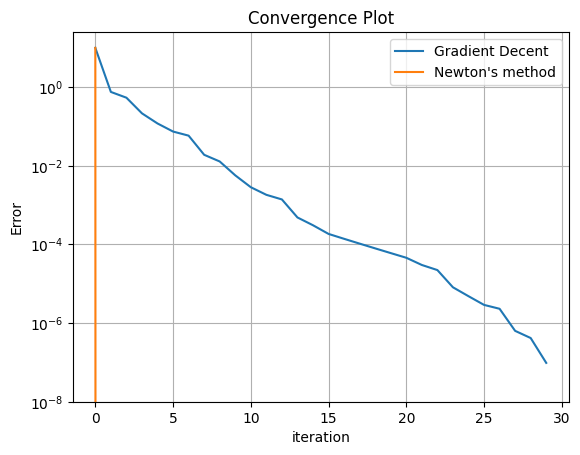

In [2]:
# %%
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as ppl


# defines the distance squared function
def distance_sq(x):
    eq = (2 - 2 * x[0] - 3 * x[1]) ** 2 + x[0] ** 2 + (x[1] - 1) ** 2
    return eq


# defines the gradient of the distance squared function
def distance_sq_g(x):
    der = np.zeros_like(x)
    der[0] = -8 + 10 * x[0] + 12 * x[1]
    der[1] = -14 + 12 * x[0] + 20 * x[1]
    return der

# defines the hessian
def distance_sq_H():
    H = np.zeros((2, 2))
    H = H + np.diag([10, 20])
    H[0, 1] = 12
    H[1, 0] = H[0, 1]
    return H

# sets up the inexact line search for the gradient approach. Determines the step
def inexact_line_search(function, g0, x0, t):
    alpha = 1
    counter = 0
    func_eval = function(x0 - alpha * g0)
    phi_eval = function(x0) - t * g0.T @ g0 * alpha
    while func_eval > phi_eval and counter < 100:
        alpha = alpha / 2
        counter += 1
        func_eval = function(x0 - alpha * g0)
        phi_eval = function(x0) - t * g0.T @ g0 * alpha
    xnew = x0 - alpha * g0
    return xnew

# gradient approach
def gradient_decent_inexact_line_search(function, gradient, x0, t, tollerance):
    counter = 0 # initializes counter for failure purposes
    g0 = gradient(x0) # calculates initial gradient
    g0norm = np.linalg.norm(g0) # takes the norm of the gradient
    x0track = x0 # initializes the tracking of solutions with the initial guess
    distance_track = np.array([function(x0)]) # initializes the tracking of the functional value
    while g0norm > tollerance and counter < 100:
        counter += 1 # moves counter up by 1
        x0 = inexact_line_search(function, g0, x0, t) # uses inexact line search to find a good step to take, finds new position
        g0 = gradient(x0) # calculates gradient and new position
        g0norm = np.linalg.norm(g0) # calculates norm of gradient at new position
        x0track = np.vstack((x0track, x0)) # tacks new solution
        distance0 = np.array([function(x0)]) # calculates new function value for tracking purposes
        distance_track = np.concatenate((distance_track, distance0)) # tracks functional value
    success = g0norm < tollerance # used to report if algorythm was a success
    distance = function(x0)
    print("Gradient method was a success: " + str(success) + "\nx values = "), print(x0), print("\nMinimum distance: "), print(np.sqrt(distance)) # prints results of algorythm
    return x0, x0track, distance_track


x0 = np.array([1, 1])
(x_final, x_track, distance_track) = gradient_decent_inexact_line_search(distance_sq, distance_sq_g, x0, 0.5, 1e-3)
iteration_count = np.count_nonzero(distance_track, axis=0) # runs gradient function
print('completed in ' + str(iteration_count-1) + ' iterations')

# for graphing purposes
x_axis = np.arange(iteration_count - 1)
y_axis = distance_track[:iteration_count - 1] - distance_track[-1]


def newton_method(function, gradient, hessian, x0, tollerance):
    counter = 0 # initializes counter for failure purposes
    g0 = gradient(x0) # calculates initial gradien
    g0norm = np.linalg.norm(g0) # takes the norm of the gradient
    x0track = x0 # initializes the tracking of solutions with the initial guess
    distance_track = np.array([function(x0)]) # initializes the tracking of the functional value
    while g0norm > tollerance and counter < 100:
        counter += 1 # moves counter up by 1
        h = hessian() # calculates the hessian
        deltax = - np.linalg.inv(h) @ g0 # calculates step size to take
        x0 = x0 + deltax # uses step size to determine new location
        g0 = gradient(x0) # calculates the gradient at new location
        g0norm = np.linalg.norm(g0) # takes norm of the gradient for logical evaluation
        x0track = np.vstack((x0track, x0)) # tacks new solution
        distance0 = np.array([function(x0)]) # calculates new function value for tracking purpose
        distance_track = np.concatenate((distance_track, distance0)) # tracks functional value
    success = g0norm < tollerance # used to report if algorythm was a success
    distance = function(x0)
    print("Newton method was a success: " + str(success) + "\nx values = "), print(x0), print("\nMinimum distance: "), print(np.sqrt(distance))
    return x0, x0track, distance_track

(solution_newton, track_newton, track_distance_newton) = newton_method(distance_sq, distance_sq_g, distance_sq_H, x0, 1e-3)
iteration_count_newton = np.count_nonzero(track_distance_newton, axis=0) # runs the newton algorythm
print('completed in ' + str(iteration_count_newton - 1) + ' iterations')
# ploting setup
x_axis_newton = np.arange(iteration_count_newton)
y_axis_newton = track_distance_newton[:iteration_count] - distance_track[-1]

#ploting setup
fig, ax = ppl.subplots()
ax.set_yscale('log')
ax.plot(x_axis, y_axis, label='Gradient Decent')
ax.plot(x_axis_newton, y_axis_newton, label= 'Newton\'s method')
plt.xlabel('iteration')
plt.ylim(bottom=10 ** -8)
plt.ylabel('Error')
plt.grid(True)
plt.title('Convergence Plot')
plt.legend()

# Final result printing
initial_x_values = np.array([1-2*x0[0] - 3*x0[1] , x0[0], x0[1]])
final_x_values_grad = np.array([1- 2*x_final[0] - 3*x_final[1], x_final[0], x_final[1]])
final_x_values_newton = np.array([1 - 2*solution_newton[0] - 3*solution_newton[1], solution_newton[0], solution_newton[1]])
print("initial guess: " + np.array2string(initial_x_values, formatter= {'float_kind' :lambda initial_x_values: "%.5f" % initial_x_values}) + '\nFinal x values for gradient method: ' + np.array2string(final_x_values_grad, formatter= {'float_kind' :lambda final_x_values_grad: "%.5f" % final_x_values_grad}) + '\nFinal x values for Newton\'s method: ' + np.array2string(final_x_values_newton,formatter= {'float_kind' :lambda final_x_values_newton: "%.5f" % final_x_values_newton} ))

### Problem 2b Summary
 The above code uses two different methods to find the minimum. The first is a gradient approach using an inexact line search to find a good step size. The second is Newton's approach. Both systems were tested at the same points of $ x = \begin{bmatrix} -4 \\ 1 \\ 1 \end{bmatrix} \  $ <br>
 The fallowing are the solutions given:
 Gradient:   $ x = \begin{bmatrix} -1.07139 \\ -0.14258 \\ 0.78552 \end{bmatrix} \ $ with a distance = 0.26726146302391546
 Newton:     $ x = \begin{bmatrix} -1.07143 \\ -0.14286 \\ 0.78571 \end{bmatrix} \ $ with a distance = 0.2672612419124244
 <br> it should be noted that the newton's method converges instantly. This is because the function being minimized is a second order function and Newton's method uses a second order approximation to reach a final solution. This leads to an immediate convergence after one iteration.

## Problem 3
Prove that a hyperplane is a convex set
A hyperplane can be defined using $ a^Tx = c \ $ for $x \in \mathbb{R}^n\ $ where a is the normal direction of the hyperplane and c is some constant.<br>
$a^Tx = c \ $ is a linear equation as it would multiply out as follows:
\begin{equation} a_1x_1 + a_2x_2 + ... +a_nx_n = c \end{equation} this is a linear equation and linear equations contain convex sets.


## Problem 4
\begin{equation*}
\begin{aligned}
& \underset{x}{\text{min}}
& & \underset{x}{\text{max}} \left\{ h(a^T_k p, I_t) \right\} \\
& \text{subject to}
& & 0 \leq p_i \leq p_{max}
\end{aligned}
\end{equation*}

\begin{equation} h(I,I_t) =
\begin{cases}
\frac{I_t}{I} & \quad \text{if } I \leq I_t \\
\frac{I}{I_t} & \quad \text{if } I_t < I
\end{cases}
\end{equation}

Since every h is of similar form for all $h_k$  then if $ \text{max} \left\{ h(a_1^TP,I_t) \right\} $ is convex, all equations are convex and the problem overall is convex with respect to p. It should be noted that the constraint is linear and so convex. This can be proven with the Hessian
\begin{equation*}
\begin{aligned}
& h(a_1^T p,I_t) \\
& \frac{\partial h}{\partial p} & &= \frac{\mathrm{d}h}{\mathrm{d}I} \frac{\partial a_1^Tp}{\partial p} & & &= h' a_1 \\
& \frac {\partial ^2 h}{\partial p^2} & &= \frac{\mathrm{d}h'}{\mathrm{d}I} \frac{\partial a_1^Tp}{\partial p} a_1^T & & &= h''a_1a_1^T
\end{aligned}
\end{equation*}

\begin{equation} h'(I,I_t) =
\begin{cases}
\frac{-I_t}{I^2} & \quad \text{if } I \leq I_t \\
\frac{1}{I_t} & \quad \text{if } I_t < I
\end{cases}
\end{equation}
\begin{equation} h''(I,I_t) =
\begin{cases}
\frac{2I_t}{I^3} & \quad \text{if } I \leq I_t \\
0 & \quad \text{if } I_t < I
\end{cases}
\end{equation}<br>
Since $ 0 \leq p_i \leq p_{max}\ \therefore 0 \leq I$  Looking at the above equations, this makes the hessian positive semi definite for the interested region and the problem is convex.
<br><br>
Part b) if any of the 10 lamps must have a power of less than $p^*$  will the problem have a unique solution?<br>
No, this will not have unique solution. If $p^*$  was a unique solution, the function value would be at a local minimum. If it was required that the solution could not sit at this local minimum, there will be more than one solution with the same functional value, as is the nature with a convex function.<br>
part c) If we require no more than 10 lamps to be switched on (p>0), will the problem have a unique solution? <br>
Yes, as long as there are 10 or more mirrors and assuming each light is independent (columns of a transpose are linearly independent) this problem will have a unique solution.

## Problem 5
Show that $ c^*(x) = \underset{x}{\text{max}} (xy- c(x))\ $ is convex <br>
Since a max function is convex if each internal function is convex, I only need to evaluate in internal function.
\begin{equation*}
\begin{gather*}
f(x,y) = xy-c(x) \\
\frac{\partial f(x,y)}{\partial y} = x - 0 = x \\
\frac{\partial ^2 f}{\partial y^2} = 0 \quad
\end{gather*}
\end{equation*}

<br>
Since the 1-dimensional Hessian is 0 (PSD), this cost equation is convex with respect to y